In [7]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display
# plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
plt.style.use([ "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [8]:
from importlib import reload
import DataReader
reload(DataReader)
from DataReader import WaveDumpReader,Workflow_WaveformRec
from copy import copy
# dir_path = {"w/ LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave0.dat",
#             "w/o LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/DarkNoise_10min/wave0.dat",
#             "w/ LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave1.dat",
#             "w/o LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/DarkNoise_10min/wave1.dat",
#             }
dir_path = {"w/ LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave0.dat",
            # "w/o LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/DarkNoise_Am241_triggerCh0_2/wave0.dat",
            "w/ LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave1.dat",
            # "w/o LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/DarkNoise_Am241_triggerCh0_2/wave1.dat",
            }
dir_df_data = {}
for key,path in dir_path.items():
    df_data = WaveDumpReader(path, nEvts=10000)
    df_data = df_data[1000:].reset_index()
    df_data_signal = Workflow_WaveformRec(df_data,plot_check=False, threshold_times_std=5,)
    del df_data
    dir_df_data[key] = copy(df_data_signal)


In [9]:
reload(DataReader)
from DataReader import  GetTQArrays
dir_TQ_diff_source = {}
for key,df_data_signal in dir_df_data.items():
    dir_TQ = GetTQArrays(df_data_signal)
    dir_TQ_diff_source[key] = dir_TQ


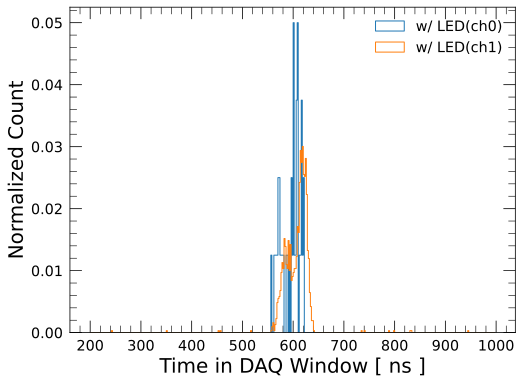

In [10]:
for key,dir_TQ in dir_TQ_diff_source.items():
    plt.hist(dir_TQ["T"], bins=range(200, 1000,2),histtype="step",density=True,
             label=key)
plt.xlabel("Time in DAQ Window [ ns ]")
plt.ylabel("Normalized Count")
plt.legend()

Text(0, 0.5, 'Count of Hits')

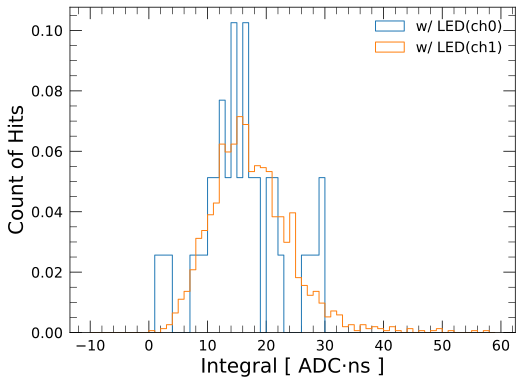

In [11]:
for key,dir_TQ in dir_TQ_diff_source.items():
    plt.hist(dir_TQ["Q"][(dir_TQ["valley"]>-2)], bins=np.arange(-10,60), histtype="step",density=True,
             label=key)
    # plt.hist(dir_TQ["Q"], bins=np.arange(-10,50), histtype="step",density=True,
    #          label=key)
    # plt.figure()
    # plt.hist2d(dir_TQ["Q"],dir_TQ["valley"], bins=(100,100),cmap="Blues")
plt.legend()
plt.xlabel("Integral [ ADC$\cdot$ns ]")
plt.ylabel("Count of Hits")

Text(0, 0.5, 'Count of Hits')

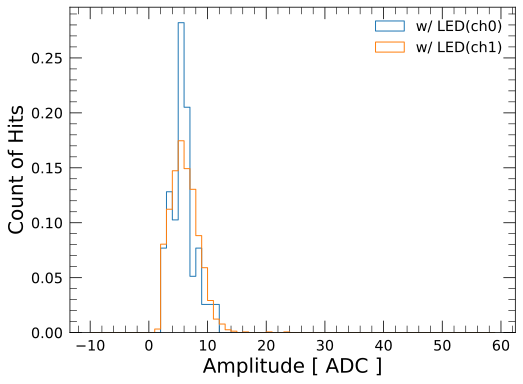

In [12]:
for key,dir_TQ in dir_TQ_diff_source.items():
    plt.hist(dir_TQ["amplitude"][(dir_TQ["valley"]>-2)], bins=np.arange(-10,60), histtype="step",density=True,
             label=key)
    # plt.hist(dir_TQ["Q"], bins=np.arange(-10,50), histtype="step",density=True,
    #          label=key)
    # plt.figure()
    # plt.hist2d(dir_TQ["Q"],dir_TQ["valley"], bins=(100,100),cmap="Blues")
plt.legend()
plt.xlabel("Amplitude [ ADC ]")
plt.ylabel("Count of Hits")

In [13]:
plt.hist(dir_df_data["w/o LED(ch0)"]["triggerTimeTag"],bins=30)
plt.xlabel("Trigger Time [ ns ]")
plt.ylabel("N of Events")
plt.title("w/o LED (ch0)")

v_triggerTime = dir_df_data["w/o LED(ch0)"]["triggerTimeTag"]
print("Dark Noise Rate:\t", len(v_triggerTime)/(max(v_triggerTime)-min(v_triggerTime))*1e9)

KeyError: 'w/o LED(ch0)'

In [ ]:
from DataReader import WaveformRec
for key, df_data in dir_df_data.items():
    for wave in df_data[(df_data["valley_min"]<-1)]["waveform_sub_base"][:1]:
        plt.figure()
        WaveformRec(wave,plot_check=True, threshold_times_std=5)
        plt.xlim(500,800)
        plt.xlabel("Time [ ns ]")
        plt.ylabel("ADC")
        plt.title("WaveformRec")

    break

In [ ]:
reload(DataReader)
from DataReader import PlotWaveformHist2d
fig, axes = plt.subplots(2,2,figsize=(20, 16))
axes = np.concatenate(axes)
for i,(key,df_data_signal) in enumerate( dir_df_data.items() ):
    PlotWaveformHist2d(np.array(df_data_signal[(df_data_signal["valley_min"]>-2)&
                                               (df_data_signal["charge_max"]>15)]["waveform_sub_base"]),
                        bins=(range(180, 230), range(-15, 30)),
                        show_h2d=True, logz=True, ax=axes[i],
                        fig=fig)
    axes[i].set_title(key)

In [ ]:
from matplotlib.colors import LogNorm
for key,dir_TQ in dir_TQ_diff_source.items():
    plt.figure()
    plt.hist2d( dir_TQ["Q"], dir_TQ["width"], bins=(np.linspace(0,40,50),range(3,20)),cmap="Blues",
                norm=None)
    plt.title(key)
    plt.xlabel("Charge")
    plt.ylabel("Pulse Width [ ns ]")
    


In [ ]:
import seaborn as sns
sns.histplot( df_data_signal["triggerTimeTag"], bins=100)

In [ ]:
df_data_signal

In [ ]:
for key,dir_TQ in dir_TQ_diff_source.items():
    PlotWaveformHist2d(np.array(dir_df_data[key][dir_TQ["width_max"]<8]["waveform_sub_base"]),
                        bins=(range(180, 230), range(-15, 30)),
                        show_h2d=True)
    plt.xlim(180,250)
    plt.title(key)

In [ ]:
v_charge = []
for key,df_data_signal in dir_df_data.items():
    for wave in df_data_signal["waveform_sub_base"]:
        v_charge.append( np.sum(wave[350:650]) )
    plt.hist(v_charge, bins=np.linspace(-50,200,50), histtype="step",density=True)